## Hotel Reviews - Final Project of DSC511

#### Libraries

In [7]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Loading dataset

original_data = pd.read_csv('./data/Hotel_Reviews.csv/Hotel_Reviews.csv')

#### Understanding the data - EDA

In [11]:
# Checking with how many rows and columns we have to deal with

original_data.shape

(515738, 17)

Our dataset consists of 515,738 observations and 17 features. In order to see the names of the 17 columns (features) we can do the following.
In order to achieve computational efficiency we will take a smaller random sample of the original dataset. This way the code will run faster making it computationally cheaper.

In [13]:
# Taking as a sample approximately 50k observations

original_sample = original_data.sample(n=50000, random_state=42)  # Change n as needed

In [15]:
original_sample.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [17]:
# Checking for duplicates

original_sample.duplicated().any()

True

In [19]:
duplicate_columns = [col for col in original_sample.columns if original_sample[col].duplicated().any()]
print("Columns containing duplicates:", duplicate_columns)

Columns containing duplicates: ['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date', 'Average_Score', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Positive_Review', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags', 'days_since_review', 'lat', 'lng']


After checking whether the dataset contains duplicates, it turns out that duplicates exist in all of the attributes. To see exactly how many they are we can apply .sum().

In [21]:
original_sample.duplicated().sum()

3

The amount of duplicated values corresponds to almost 0% of the whole sample. This is why the duplicates could stay untached without causing any issues in further analysis.

In [23]:
# Seeing the first 5 records of the dataset

original_sample.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
488440,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,9.6,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
274649,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,8.8,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
374688,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,7.9,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
404352,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,10.0,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
451596,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,9.6,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [25]:
# Checking what types of attributes we have

original_sample.dtypes

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object

From above it's obvious that some attributes will nedd encoding (i.e Reviewer_Nationality).

In [27]:
# Summary statistics only for numerical features

original_sample.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,49684.000000,49684.000000
mean,496.513560,8.400626,18.399160,2740.537820,17.732380,7.072420,8.392114,49.416070,2.832537
std,498.900962,0.546371,29.292821,2312.958819,21.989375,10.684713,1.643735,3.478101,4.584495
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.213425,-0.142613
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.019886
75%,641.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516191,4.834443
max,2682.000000,9.800000,384.000000,16670.000000,383.000000,219.000000,10.000000,52.400181,16.429233


From the statistical summary above we can decide wheather our data needs scaling or not based on mean and std values. Here mean ranges from 8.4 (΄Average_Score΄) to 496.51 (΄Additional_Number_of_Scoring΄). This is an indication that scaling will be necessary since we are talking about a big enough difference in the scale of our data. Also, it is obvious that numerical feaures do not contain null (NA) values since the count is equal to the number of observations we have in the sample.

In [29]:
# Checking how many null values each column has
# Mostly necessary for non-numeric features

original_sample.isnull().sum()

Hotel_Address                                   0
Additional_Number_of_Scoring                    0
Review_Date                                     0
Average_Score                                   0
Hotel_Name                                      0
Reviewer_Nationality                            0
Negative_Review                                 0
Review_Total_Negative_Word_Counts               0
Total_Number_of_Reviews                         0
Positive_Review                                 0
Review_Total_Positive_Word_Counts               0
Total_Number_of_Reviews_Reviewer_Has_Given      0
Reviewer_Score                                  0
Tags                                            0
days_since_review                               0
lat                                           316
lng                                           316
dtype: int64

We can notice that the columns ΄lat΄ and ΄lng΄ hae null values in them. The total number of null values equals to 632 out of 50,000 observations. The 632 observations correspond to 1.26% of the whole sample. This mean that those rows can safely be removed without causing any bias in our results.

In [31]:
# This part is done 'in place'

original_sample.dropna(inplace = True)

In [33]:
# Checking for certainty

original_sample.isnull().any()

Hotel_Address                                 False
Additional_Number_of_Scoring                  False
Review_Date                                   False
Average_Score                                 False
Hotel_Name                                    False
Reviewer_Nationality                          False
Negative_Review                               False
Review_Total_Negative_Word_Counts             False
Total_Number_of_Reviews                       False
Positive_Review                               False
Review_Total_Positive_Word_Counts             False
Total_Number_of_Reviews_Reviewer_Has_Given    False
Reviewer_Score                                False
Tags                                          False
days_since_review                             False
lat                                           False
lng                                           False
dtype: bool

#### Checking for skewness in the target variable

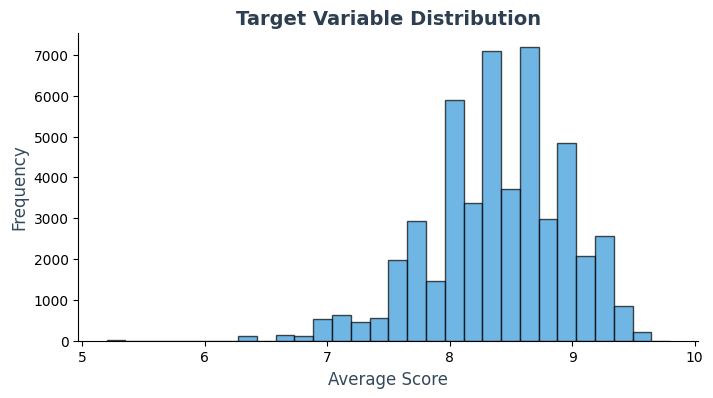

In [35]:
# Creating the histogram

plt.figure(figsize=(8, 4))  # Setting figure size
plt.hist(original_sample['Average_Score'], bins=30, color='#3498db', edgecolor='black', alpha=0.7)

plt.title('Target Variable Distribution', fontsize=14, fontweight='bold', color='#2c3e50')
plt.xlabel('Average Score', fontsize=12, color='#34495e')
plt.ylabel('Frequency', fontsize=12, color='#34495e')

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.show()

From the statistical summary we saw that the mean of the ΄Average_Score΄ is close to 8,4 and from the plot we can see that our target variable is slightly skewed to the left. This could potentially be due to the presence of an outlier around the value 6,3 - 6,4. To be more spesific about the skewness we can use .skew().

In [37]:
original_sample['Average_Score'].skew()

-0.5619064150029174

#### Checking for linear correlation between numeric features and the target variable

In [3]:
!pip install seaborn

<Figure size 1200x800 with 0 Axes>

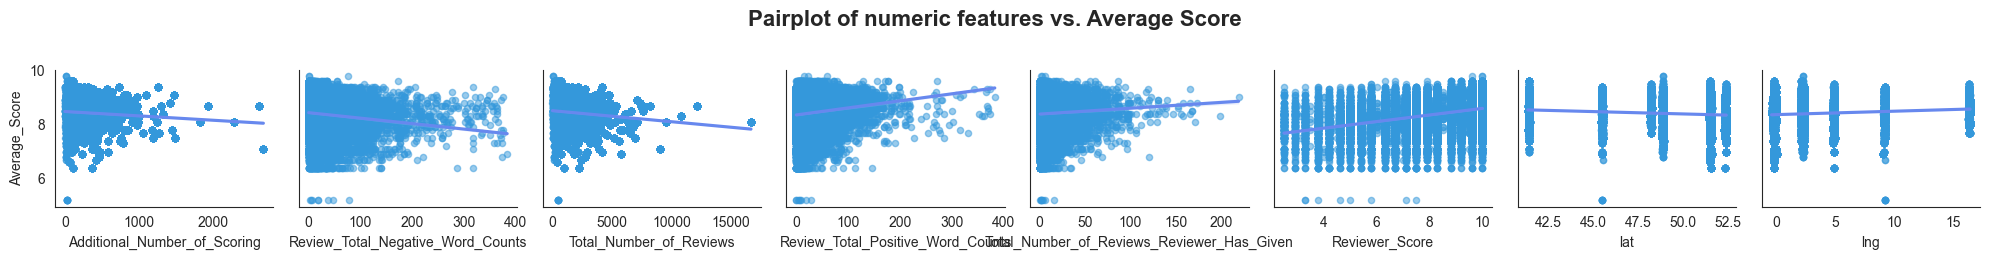

In [53]:
# Setting Seaborn style for a cleaner look
    
sns.set_style("white")  
sns.set_palette("coolwarm")  

plt.figure(figsize=(12, 8))

# Creating the pairplot
g = sns.pairplot(
    original_sample,
    x_vars=[
        'Additional_Number_of_Scoring', 'Review_Total_Negative_Word_Counts', 
        'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng'
    ],
    y_vars="Average_Score",
    kind="reg",  # Regression line
    plot_kws={'scatter_kws': {'alpha': 0.5, 's': 20, 'color': '#3498db'}},  # Customize scatter points
    height=2.5,  # Adjust individual plot height
)

# Improve spacing
plt.suptitle("Pairplot of numeric features vs. Average Score", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Show the plot
plt.show()

It appears that none of the numeric features are linearly correlated to our target variable ΄Average_Score΄ except from ΄Reviewer_Score΄. The points in the 6th plot slope widely around the purple line which is an indication of a weak linear correlation.

#### Visualizing correlation using a heatmap

<Axes: >

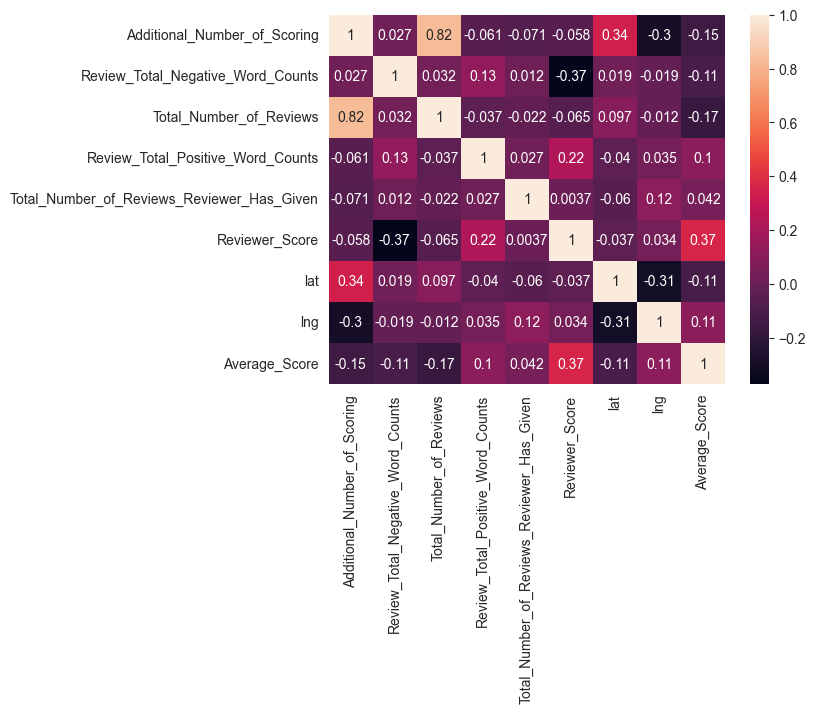

In [59]:
# An alternative way to visualize linear correlation

fig, ax = plt.subplots()

num_features = original_sample[[
        'Additional_Number_of_Scoring', 'Review_Total_Negative_Word_Counts', 
        'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 
        'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'lat', 'lng', 'Average_Score'
    ]]
sns.heatmap(num_features.corr(method='pearson'), annot=True)

From the heatmap we can see that ΄Additional_Number_of_Scoring΄ and ΄Total_Number_of_Reviews΄ are highly linearly correlated since the correlation coefficient is equal to 0.82 (very close to 1). We can also see a weak linera correlation between ΄Additional_Number_of_Scoring΄ and ΄lat΄ where the correlation coefficient is equal to 0,34. As already studied in the previous pairplots ΄Average_Score΄ and ΄Reviewer_Score΄ are linearly correlated even though their correlation is also pretty weak (correlation coefficient equals to 0,37).